In [29]:
%load_ext autoreload
%autoreload 2

import sys

sys.path.append('/global/homes/l/lbigwood/S4Mock/')

import numpy as np
from   astropy.table import Table, unique,vstack,join, unique
from   ros_tools import tile2rosette, calc_rosr
import S4Mock_io
import matplotlib.pyplot as plt
import glob
import pylab as pl
from astropy.io import fits as fits
from   desitarget.sv3.sv3_targetmask import desi_mask, bgs_mask, mws_mask
from desimodel.focalplane.geometry import get_tile_radius_deg

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [30]:
nights    = [x.split('/')[-1] for x in sorted(glob.glob('/global/cscratch1/sd/mjwilson/altmtls/ledger/initial/Univ000/fa/SV3' + '/*'))]

In [31]:
tiles = S4Mock_io.read_sv3tiles()
rosettes = np.unique(tiles['ROSETTE']).data

In [66]:
tiles

TILEID,PASS,RA,DEC,PROGRAM,IN_DESI,PRIORITY,STATUS,EBV_MED,DESIGNHA,DONEFRAC,AVAILABLE,ROSETTE
int64,int32,float64,float64,str6,bool,float64,str8,float32,float32,float32,bool,int64
12,0,150.04,2.286,BRIGHT,True,0.000e+00,done,0.022782475,0.00,1.0455,False,0
13,1,150.061,2.069,BRIGHT,True,0.000e+00,done,0.023243327,0.00,1.1505,False,0
14,2,150.212,2.226,BRIGHT,True,0.000e+00,done,0.022683823,0.00,1.0456,False,0
15,3,149.98,2.171,BRIGHT,True,0.000e+00,done,0.023039486,0.00,1.1052,False,0
16,4,150.187,2.099,BRIGHT,True,0.000e+00,done,0.023041949,0.00,1.0776,False,0
17,5,150.106,2.302,BRIGHT,True,0.000e+00,done,0.022638734,0.00,1.1865,False,0
18,6,149.993,2.237,BRIGHT,True,0.000e+00,done,0.022844847,0.00,1.4589,False,0
19,7,150.128,2.065,BRIGHT,True,0.000e+00,done,0.023041053,0.00,1.3565,False,0
20,8,150.17,2.28,BRIGHT,True,0.000e+00,done,0.02263027,0.00,1.1368,False,0


In [32]:
rand = vstack([Table.read(x) for x in glob.glob('/global/cfs/cdirs/desi/survey/catalogs/SV3/LSS/random*/rancomb_brightwdup_Alltiles.fits')])

# TODO:  Check TARGETID is a unique identifier, or bug.  If not, use RA. 
#rand             = unique(rand, keys='TARGETID')
rand['ROS']      = np.array([tile2rosette(x) for x in rand['TILEID']]) 

In [33]:
get_tile_radius_deg()

1.6280324520485583

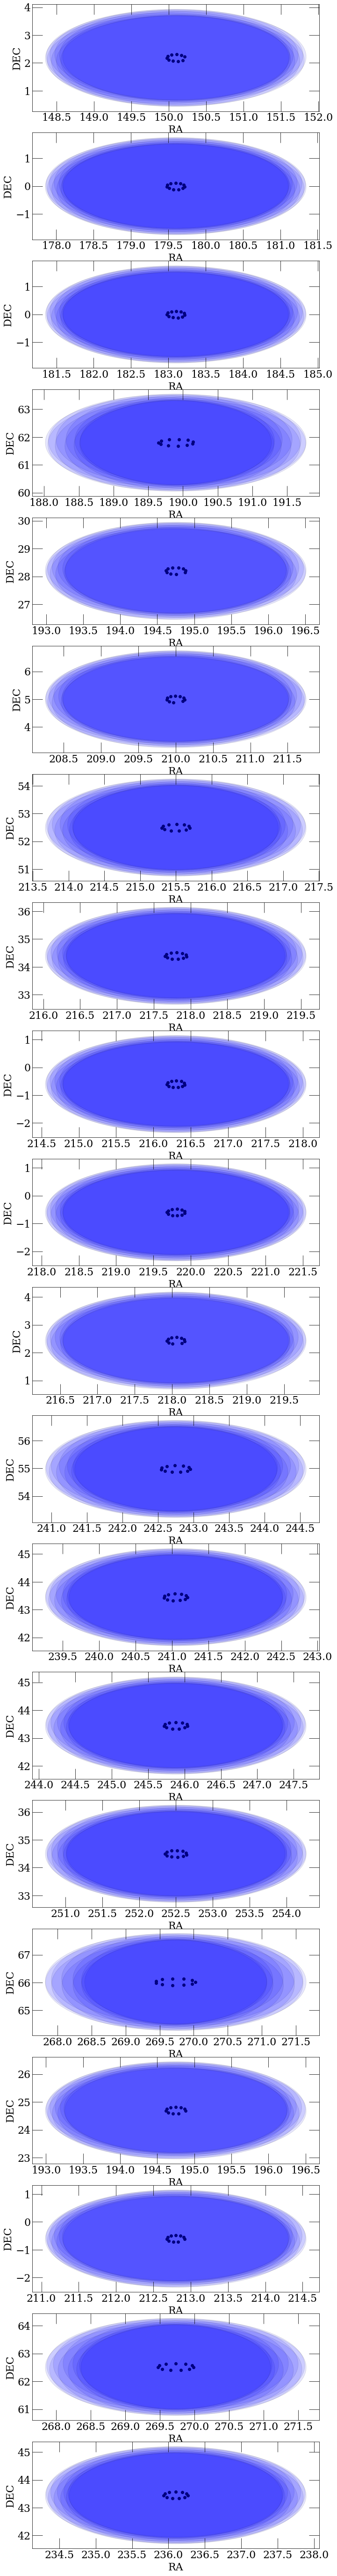

In [34]:
nrosette=20

fig, all_axes = plt.subplots(nrosette, figsize=(11,5 * nrosette))

for rosn in np.arange(nrosette):
    tiles0 = tiles[(tiles['ROSETTE']==rosn)]
    rand0 = rand[(rand['ROS']==rosn)]

    axes = all_axes[rosn]
    
    for i in range(len(tiles0)):
        xc = tiles0[i]['RA']
        yc = tiles0[i]['DEC']
        circle = plt.Circle((xc, yc), radius= 1.628, facecolor='blue',edgecolor='black',alpha=0.1)
        axes.add_patch(circle)
        axes.scatter(xc,yc,color='navy',zorder=3)

    #axes.scatter(rand0['RA'],rand0['DEC'],alpha=0.15,marker='x',color='pink',zorder=2)
    axes.set_xlabel('RA')
    axes.set_ylabel('DEC')

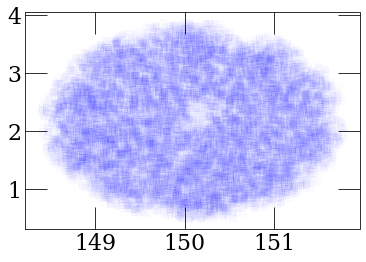

In [35]:
rand = Table.read('/global/cfs/cdirs/desi/survey/catalogs/SV3/LSS/random0/rancomb_brightwdup_Alltiles.fits')
rand['ROS'] = np.array([tile2rosette(x) for x in rand['TILEID']]) 

tiles0 = tiles[(tiles['ROSETTE']==0)]
rand0 = rand[(rand['ROS']==0)][::10]

pl.scatter(rand0['RA'],rand0['DEC'],alpha=0.01,marker=',',color='blue',zorder=2)
#pl.xlabel('RA')
#pl.ylabel('DEC)
#available 

In [36]:
ros=0

rand = Table.read('/global/cfs/cdirs/desi/survey/catalogs/SV3/LSS/random0/rancomb_brightwdup_Alltiles.fits')
rand['ROS']      = np.array([tile2rosette(x) for x in rand['TILEID']]) 

rand['ROS_DIST'] = 1.e99

rand = rand[rand['ROS'] == ros]

for rosn in np.unique(rand['ROS']):
    isin = (rand['ROS'].data == rosn)

    new_dist = calc_rosr(rosn, rand['RA'][isin], rand['DEC'][isin])

    rand['ROS_DIST'][isin] = np.minimum(rand['ROS_DIST'][isin], new_dist)

In [37]:
tiles0 = tiles[(tiles['ROSETTE']==0)]
rand0 = rand[(rand['ROS']==0)]

Text(0, 0.5, 'DEC')

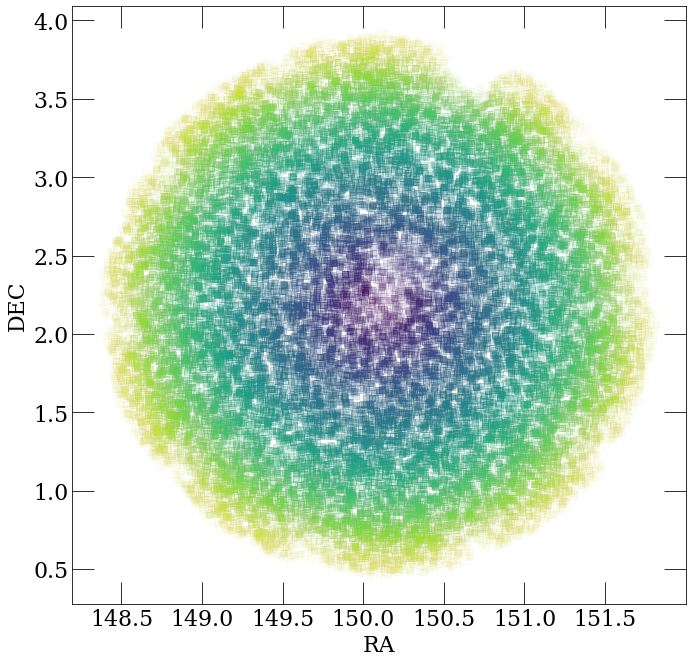

In [38]:
fig = plt.figure(figsize=(11,11))
axes = fig.add_subplot(111)

axes.scatter(rand0['RA'],rand0['DEC'],alpha=0.02,marker=',',c=rand['ROS_DIST'])
axes.set_xlabel('RA')
axes.set_ylabel('DEC')

Text(0, 0.5, 'DEC')

<Figure size 864x720 with 0 Axes>

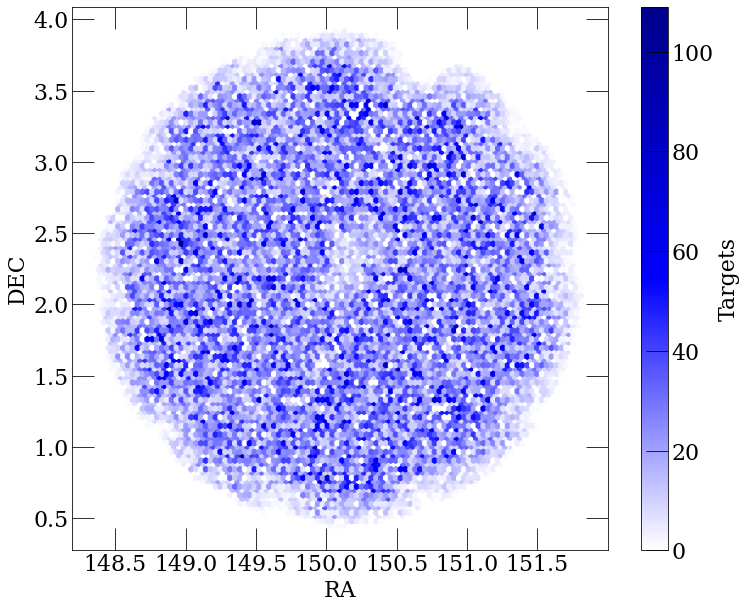

In [39]:
plt.figure(figsize=(12,10))
plt.rc('xtick',direction='in',labelsize=22,top=True)
plt.rc('ytick',direction='in',labelsize=22, right = True)
plt.rc('xtick.major',size = 22)
plt.rc('xtick.minor',size = 6)
plt.rc('ytick.major',size = 22)
plt.rc('ytick.minor',size = 6)
plt.rc('axes', labelsize = 22)
plt.rc('legend',fontsize=22)
plt.rc('font', family='serif',size=20)

from matplotlib.colors import LinearSegmentedColormap

plt.figure(figsize=(12,10))
cmap0 = LinearSegmentedColormap.from_list('', ['white','blue', 'darkblue'])

plt.hexbin(rand0['RA'],rand0['DEC'],cmap=cmap0)

cbar = plt.colorbar()
cbar.set_label('Targets')
plt.xlabel('RA')
plt.ylabel('DEC')

(array([  69.,  126.,  238.,  388.,  485.,  878., 1030., 1204., 1254.,
        1672., 1533., 2162., 2065., 2456., 2636., 2813., 2972., 3081.,
        3376., 3583., 3574., 3912., 3966., 4170., 4216., 4330., 4968.,
        4790., 5311., 5283., 5574., 5422., 5581., 5940., 6052., 6871.,
        6306., 6852., 6776., 6402., 6752., 6418., 6181., 4816., 4073.,
        3451., 2866., 2270., 1491.,  314.]),
 array([0.01093937, 0.04559964, 0.08025991, 0.11492017, 0.14958044,
        0.18424071, 0.21890097, 0.25356124, 0.28822151, 0.32288178,
        0.35754204, 0.39220231, 0.42686258, 0.46152284, 0.49618311,
        0.53084338, 0.56550365, 0.60016391, 0.63482418, 0.66948445,
        0.70414471, 0.73880498, 0.77346525, 0.80812552, 0.84278578,
        0.87744605, 0.91210632, 0.94676658, 0.98142685, 1.01608712,
        1.05074739, 1.08540765, 1.12006792, 1.15472819, 1.18938845,
        1.22404872, 1.25870899, 1.29336926, 1.32802952, 1.36268979,
        1.39735006, 1.43201032, 1.46667059, 1.50133086, 

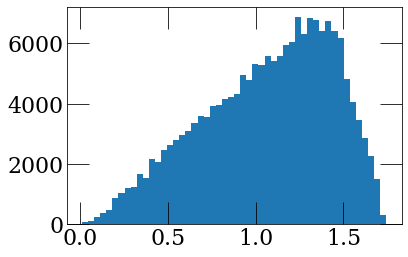

In [40]:
plt.hist(rand['ROS_DIST'],bins=50)

In [41]:
tile_stack = []

for night in nights:
    to_grab = glob.glob(f'/global/cscratch1/sd/mjwilson/altmtls/ledger/initial/Univ000/fa/SV3/{night}/fba-*.fits')
    for x in range(len(to_grab)):
        fba = Table(fits.open(to_grab[x])['FASSIGN'].data)
        fba['TILEID'] = int(to_grab[x][-11:-5]) # string.split('-')[-1].replace('.fits', '')
        fba['ROS'] = tile2rosette(int(to_grab[x][-11:-5]))
        tile_stack.append(fba)

fassign = vstack(tile_stack)

In [69]:
! ls /global/cscratch1/sd/mjwilson/altmtls/ledger/initial/Univ000/fa/SV3/20210406/

000012-targ.fits  000363-targ.fits  fa-000282.sh     fba-000201.fits
000039-targ.fits  000390-targ.fits  fa-000309.sh     fba-000228.fits
000066-targ.fits  000417-targ.fits  fa-000336.sh     fba-000255.fits
000093-targ.fits  fa-000012.sh	    fa-000363.sh     fba-000282.fits
000120-targ.fits  fa-000039.sh	    fa-000390.sh     fba-000309.fits
000147-targ.fits  fa-000066.sh	    fa-000417.sh     fba-000336.fits
000174-targ.fits  fa-000093.sh	    fba-000012.fits  fba-000363.fits
000201-targ.fits  fa-000120.sh	    fba-000039.fits  fba-000390.fits
000228-targ.fits  fa-000147.sh	    fba-000066.fits  fba-000417.fits
000255-targ.fits  fa-000174.sh	    fba-000093.fits  zbest-20210406.txt
000282-targ.fits  fa-000201.sh	    fba-000120.fits
000309-targ.fits  fa-000228.sh	    fba-000147.fits
000336-targ.fits  fa-000255.sh	    fba-000174.fits


In [42]:
tile_stack = []

for night in nights:
    # to_grab = sorted(glob.glob(f'/global/cscratch1/sd/mjwilson/altmtls/ledger/initial/Univ000/fa/SV3/{night}/fba-*.fits'))

    for x in range(len(to_grab)):
        fba = Table(fits.open(to_grab[x])['FAVAIL'].data)
        fba['TILEID'] = int(to_grab[x][-11:-5])
        tile_stack.append(fba)

        # Here, we add a count of NAVAIL per targetid. 
        # TILEID at which that number becomes 3 for main-survey like

        # tiles were likely not observed in the order they assigned ....
        
favail = vstack(tile_stack)

In [43]:
ledger= S4Mock_io.read_init_ledger()

In [44]:
# fassign   = join(fassign, ledger,  keys='TARGETID', join_type='left')
# favail    = join(favail,ledger,  keys='TARGETID', join_type='left')

In [45]:
avl_ledger = ledger[np.isin(ledger['TARGETID'], favail['TARGETID'])]
avl_ledger = join(avl_ledger,favail,  keys='TARGETID', join_type='left')

In [46]:
avl_ledger = unique(avl_ledger, keys='TARGETID')

In [47]:
len(ledger) / len(avl_ledger)

2.074997614094024

In [48]:
avl_ledger = join(avl_ledger, fassign, keys='TARGETID', join_type='left')

In [49]:
sorted(avl_ledger.dtype.names)

['DEC',
 'DEVICE_LOC',
 'DEVICE_TYPE',
 'FA_TARGET',
 'FA_TYPE',
 'FIBERASSIGN_X',
 'FIBERASSIGN_Y',
 'FIBERSTATUS',
 'FIBER_1',
 'FIBER_2',
 'LAMBDA_REF',
 'LOCATION_1',
 'LOCATION_2',
 'NUMOBS',
 'NUMOBS_INIT',
 'NUMOBS_MORE',
 'OBSCONDITIONS',
 'PARALLAX',
 'PETAL_LOC',
 'PMDEC',
 'PMRA',
 'PRIORITY',
 'PRIORITY_INIT',
 'RA',
 'REF_EPOCH',
 'ROS',
 'SUBPRIORITY',
 'SV3_BGS_TARGET',
 'SV3_DESI_TARGET',
 'SV3_MWS_TARGET',
 'SV3_SCND_TARGET',
 'TARGETID',
 'TARGET_DEC',
 'TARGET_RA',
 'TARGET_STATE',
 'TILEID_1',
 'TILEID_2',
 'TIMESTAMP',
 'VERSION',
 'Z',
 'ZTILEID',
 'ZWARN']

In [50]:
# fassign = fassign[~fassign['RA'].mask]
# favail = favail[~favail['RA'].mask]

is_bright = (fassign['SV3_BGS_TARGET'] & bgs_mask['BGS_BRIGHT']) != 0
fassign_bright = fassign[is_bright]

is_bright = (favail['SV3_BGS_TARGET'] & bgs_mask['BGS_BRIGHT']) != 0
favail_bright = favail[is_bright]

In [51]:
avl_ledger['ROS_DIST'] = 1.e9

for rosn in np.arange(20):
    isin = avl_ledger['ROS'] == rosn
    
    avl_ledger['ROS_DIST'][isin] = calc_rosr(rosn, avl_ledger['RA'][isin], avl_ledger['DEC'][isin])

In [52]:
assigned = avl_ledger[~avl_ledger['FIBERASSIGN_X'].mask]

In [53]:
100. * len(assigned) / len(avl_ledger)

97.95103957075789

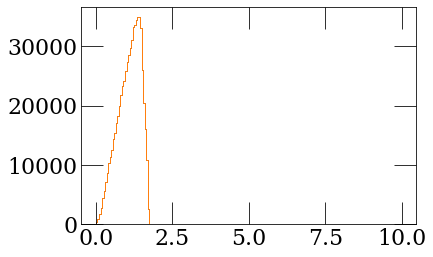

In [60]:
asssigned_counts = plt.hist(assigned['ROS_DIST'],bins=np.arange(0.0, 10.0, 0.05), histtype='step')
available_counts = plt.hist(avl_ledger['ROS_DIST'],bins=np.arange(0.0, 10.0, 0.05), histtype='step')

In [61]:
available_counts[1][:-1]

array([0.  , 0.05, 0.1 , 0.15, 0.2 , 0.25, 0.3 , 0.35, 0.4 , 0.45, 0.5 ,
       0.55, 0.6 , 0.65, 0.7 , 0.75, 0.8 , 0.85, 0.9 , 0.95, 1.  , 1.05,
       1.1 , 1.15, 1.2 , 1.25, 1.3 , 1.35, 1.4 , 1.45, 1.5 , 1.55, 1.6 ,
       1.65, 1.7 , 1.75, 1.8 , 1.85, 1.9 , 1.95, 2.  , 2.05, 2.1 , 2.15,
       2.2 , 2.25, 2.3 , 2.35, 2.4 , 2.45, 2.5 , 2.55, 2.6 , 2.65, 2.7 ,
       2.75, 2.8 , 2.85, 2.9 , 2.95, 3.  , 3.05, 3.1 , 3.15, 3.2 , 3.25,
       3.3 , 3.35, 3.4 , 3.45, 3.5 , 3.55, 3.6 , 3.65, 3.7 , 3.75, 3.8 ,
       3.85, 3.9 , 3.95, 4.  , 4.05, 4.1 , 4.15, 4.2 , 4.25, 4.3 , 4.35,
       4.4 , 4.45, 4.5 , 4.55, 4.6 , 4.65, 4.7 , 4.75, 4.8 , 4.85, 4.9 ,
       4.95, 5.  , 5.05, 5.1 , 5.15, 5.2 , 5.25, 5.3 , 5.35, 5.4 , 5.45,
       5.5 , 5.55, 5.6 , 5.65, 5.7 , 5.75, 5.8 , 5.85, 5.9 , 5.95, 6.  ,
       6.05, 6.1 , 6.15, 6.2 , 6.25, 6.3 , 6.35, 6.4 , 6.45, 6.5 , 6.55,
       6.6 , 6.65, 6.7 , 6.75, 6.8 , 6.85, 6.9 , 6.95, 7.  , 7.05, 7.1 ,
       7.15, 7.2 , 7.25, 7.3 , 7.35, 7.4 , 7.45, 7.

<ipython-input-62-59c6e5add089>:13: RuntimeWarning: invalid value encountered in true_divide
  plt.plot(available_counts[1][:-1], asssigned_counts[0] / available_counts[0])


Text(0, 0.5, 'Completeness')

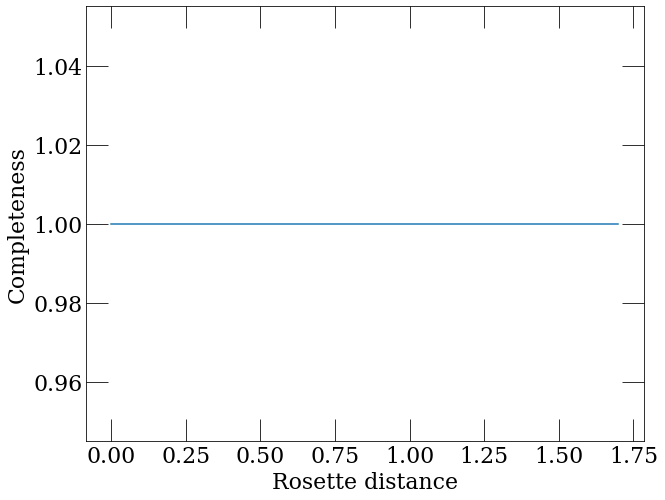

In [62]:
plt.rc('xtick',direction='in',labelsize=22,top=True)
plt.rc('ytick',direction='in',labelsize=22, right = True)
plt.rc('xtick.major',size = 22)
plt.rc('xtick.minor',size = 6)
plt.rc('ytick.major',size = 22)
plt.rc('ytick.minor',size = 6)
plt.rc('axes', labelsize = 22)
plt.rc('legend',fontsize=22)
plt.rc('font', family='serif',size=20)

plt.figure(figsize=(10,8))

plt.plot(available_counts[1][:-1], asssigned_counts[0] / available_counts[0])

plt.xlabel('Rosette distance')
plt.ylabel('Completeness')

In [63]:
available_counts[1][:-1]

array([0.  , 0.05, 0.1 , 0.15, 0.2 , 0.25, 0.3 , 0.35, 0.4 , 0.45, 0.5 ,
       0.55, 0.6 , 0.65, 0.7 , 0.75, 0.8 , 0.85, 0.9 , 0.95, 1.  , 1.05,
       1.1 , 1.15, 1.2 , 1.25, 1.3 , 1.35, 1.4 , 1.45, 1.5 , 1.55, 1.6 ,
       1.65, 1.7 , 1.75, 1.8 , 1.85, 1.9 , 1.95, 2.  , 2.05, 2.1 , 2.15,
       2.2 , 2.25, 2.3 , 2.35, 2.4 , 2.45, 2.5 , 2.55, 2.6 , 2.65, 2.7 ,
       2.75, 2.8 , 2.85, 2.9 , 2.95, 3.  , 3.05, 3.1 , 3.15, 3.2 , 3.25,
       3.3 , 3.35, 3.4 , 3.45, 3.5 , 3.55, 3.6 , 3.65, 3.7 , 3.75, 3.8 ,
       3.85, 3.9 , 3.95, 4.  , 4.05, 4.1 , 4.15, 4.2 , 4.25, 4.3 , 4.35,
       4.4 , 4.45, 4.5 , 4.55, 4.6 , 4.65, 4.7 , 4.75, 4.8 , 4.85, 4.9 ,
       4.95, 5.  , 5.05, 5.1 , 5.15, 5.2 , 5.25, 5.3 , 5.35, 5.4 , 5.45,
       5.5 , 5.55, 5.6 , 5.65, 5.7 , 5.75, 5.8 , 5.85, 5.9 , 5.95, 6.  ,
       6.05, 6.1 , 6.15, 6.2 , 6.25, 6.3 , 6.35, 6.4 , 6.45, 6.5 , 6.55,
       6.6 , 6.65, 6.7 , 6.75, 6.8 , 6.85, 6.9 , 6.95, 7.  , 7.05, 7.1 ,
       7.15, 7.2 , 7.25, 7.3 , 7.35, 7.4 , 7.45, 7.

In [64]:
asssigned_counts[0] / available_counts[0]

<ipython-input-64-1279535307f7>:1: RuntimeWarning: invalid value encountered in true_divide
  asssigned_counts[0] / available_counts[0]


array([ 1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1., nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, na

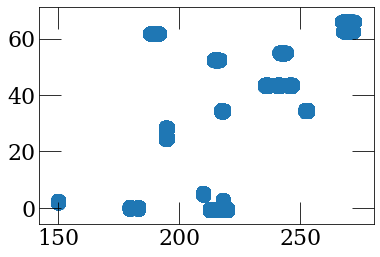

In [65]:
plt.scatter(avl_ledger['RA'],avl_ledger['DEC'])